# (Communicate Data Finding : Ford GoBike System Data)
## by (Eng.Mohamed Mostafa)

## Preliminary Wrangling

> bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [29]:
#load in the dataset into pandas df 
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [30]:
#display first 5 row
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [31]:
#explor the dataset
df.shape

(183412, 16)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [33]:
#display the null values
df[df.isnull().any(axis=1)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [34]:
#drop null records
df.dropna(axis=0,inplace=True)

In [35]:
df.shape

(174952, 16)

In [36]:
#creating a list of columb to be deleted
del_col=[ 'end_station_longitude', 'end_station_latitude', 'start_station_latitude', 'start_station_longitude','bike_share_for_all_trip']

#deleting the columns
df= df.drop(del_col,1)



In [37]:
#previewing the new dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male


In [38]:
#add count coulome and set all values =1 to use it as acunter
df['count']=1

In [39]:
#add age coulome 
df['age']=2021-df['member_birth_year']

In [40]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,count,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,1,37.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,1,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,1,47.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,1,62.0


In [41]:
#convert start time and end time to date time and creating new coulme Hour , Day , Month
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

In [42]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,count,age,month,day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,1,37.0,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1,49.0,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,1,32.0,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,1,47.0,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,1,62.0,Feb,Thu,23


In [43]:
#explor data
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,count,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,1.0,36.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,0.0,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,1.0,20.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,1.0,29.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,1.0,34.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,1.0,41.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,1.0,143.000000


### note
1- avarage age 36 years.

2- avarge trip duration 704 sec.

In [44]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  float64       
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  float64       
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  int64         
 8   user_type           174952 non-null  object        
 9   member_birth_year   174952 non-null  float64       
 10  member_gender       174952 non-null  object        
 11  count               174952 non-null  int64         
 12  age                 174952 non-null  float64       
 13  month               174952 no

### What is the structure of your dataset?

> there are 174,952 records in the dataset with 12 features ( duration_sec , start_time , end_time , start_station_id , start_station_name , end_station_id , end_station_name , bike_id , user_type , member_birth_year , member_gender, age)
### What is/are the main feature(s) of interest in your dataset?

> 1-what is the avarage age of users?
 
> 2-what is the most user type ?

> 3-what is the most gender  ?  

> 4- what is the most day of the week ?

> 5-what  the relationshipe between Age and trip duration  ?

> 6-what the gender majorty users and majorty users type    ?

> 7-what the most Day of the week for the users gender and users Types ?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender , age

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### figure 1 : " what is the avarage age of users ?"

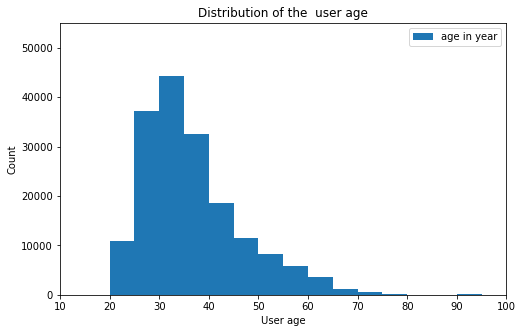

In [47]:
#  plot the distribution of age .
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins , label= 'age in year')
plt.title('Distribution of the  user age')
plt.xlabel('User age')
plt.ylabel('Count')
plt.axis([10, 100, 0, 55000])
plt.legend()


> We can see the the above plot is right-screwed, with a long tail on the right.

> the most user age from 30 :35 years



### figure 2 : " what is the most  user type ?"

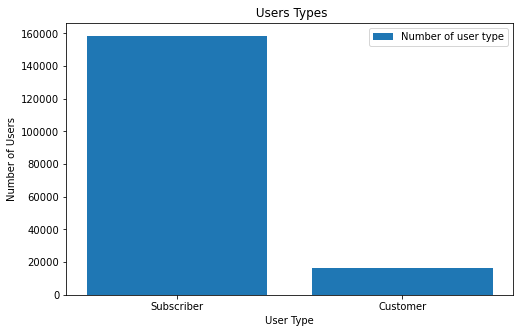

In [85]:
# types of users on bar chart.
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(),label= 'Number of user type', height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title(' Users Types');
plt.legend()

> We can see the the above plot is subscriber is the most user type

### figure 3 : " what is the most gender   ?"

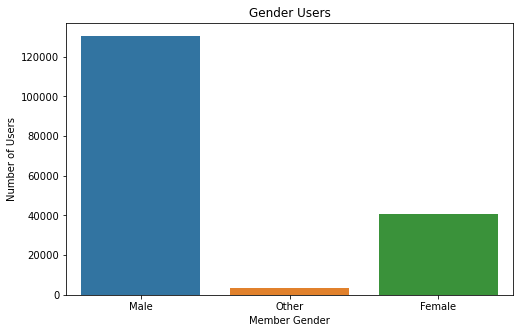

In [86]:
# plotting genders on bar chart.
plt.figure(figsize=[8,5])
sb.countplot(data = df , x = 'member_gender' );
plt.xlabel('Member Gender');
plt.title('Gender Users');
plt.ylabel('Number of Users');

> We can see the the above plot is male is the most Gender

### figure 4 : " what is the most day of the week  ?"

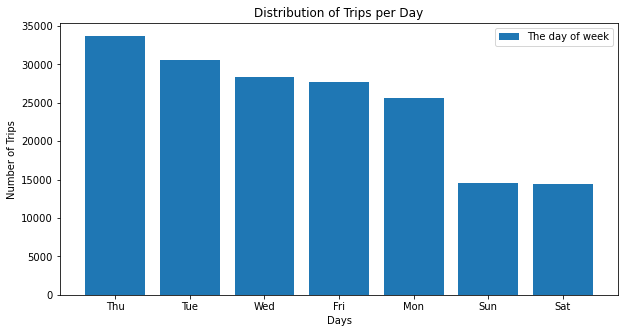

In [62]:
#most day of the week
plt.figure(figsize=[10,5])
plt.bar(x = df.day.value_counts().keys(), height = df.day.value_counts(), label = 'The day of week')
plt.xlabel('Days')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trips per Day')
plt.legend()

### Note
- clear from the above plot the thursday is most day of the week

## Bivariate Exploration

> we will see the correlation between (trip duration) and (age).

### figure 5 : " what  the relationshipe between Age and trip duration  ?"

Text(0.5, 1.0, 'Relation between the Users ages and Trip Duration')

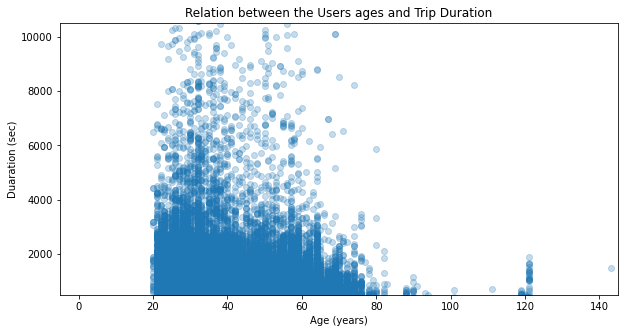

In [100]:
plt.figure(figsize=[10,5])

plt.scatter( df['age'], df['duration_sec'], alpha = 0.25, marker = 'o' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Relation between the Users ages and Trip Duration')


### figure 6 : " what  the gender majorty users and majorty users type ?"

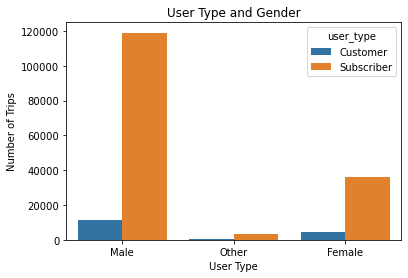

In [75]:
# user types with the different genders
sb.countplot(data = df , x = 'member_gender', hue = 'user_type');
plt.xlabel('User Type');
plt.title('User Type and Gender');
plt.ylabel('Number of Trips');

### Note
1- The male gender is the  majorty User in gender .

2-Subscriber user customer is majorty User  in type User .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> (Trip Duration) is very dependendable on the (age) of the member avarage age about 25 : 35 take the trip in shorter time than the older

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>   (Trip Duration) is very dependendable on the (gender) of the member tha male take the trip in shorter time than the female

## Multivariate Exploration

> we will see now the two categorical (gender) and (user type) into the relationship between (trip duration) and (age)

### figure 7 : " what  the most Day of the week for the users gender and users Types  ?"

Text(19.32400607638889, 0.5, 'Duration')

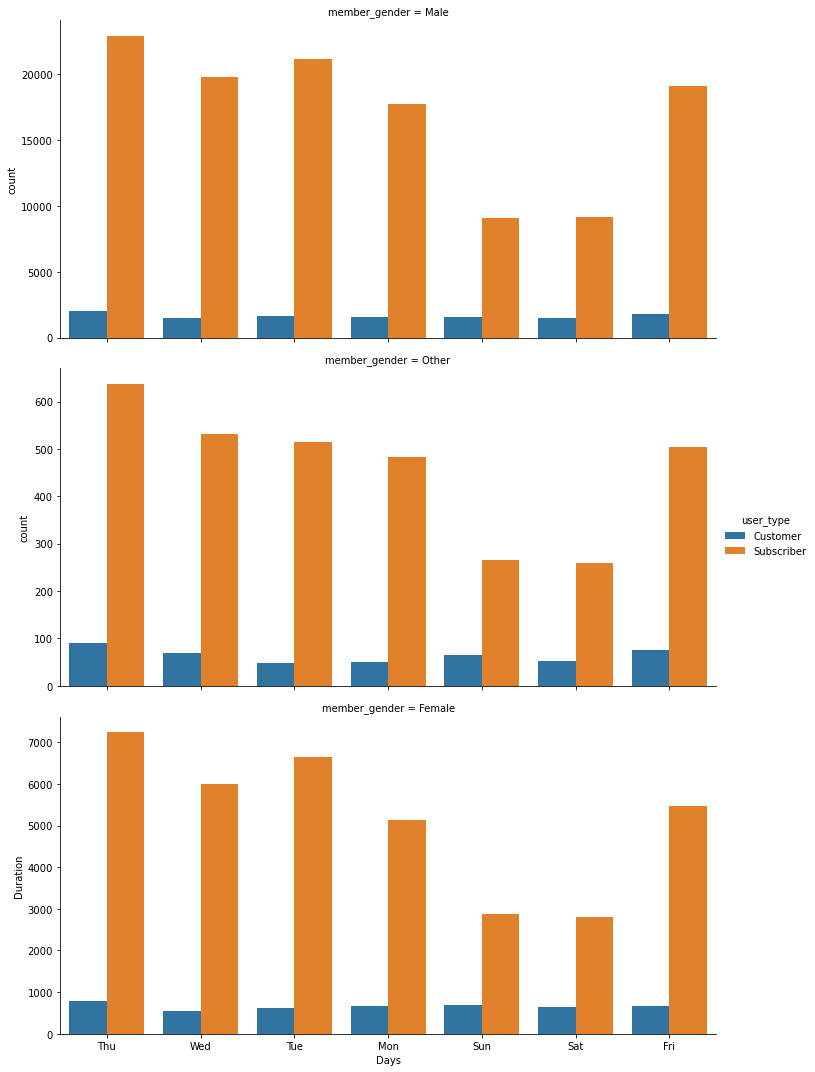

In [103]:
#plotting the user types and gender to check how they relate to trip duration
sb.catplot(data=df,x='day',col='member_gender', 
           hue='user_type', col_wrap = 1, 
           height = 5, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Days')
plt.ylabel('Duration')

### Note
1- the thursday is most day of the week of users genders and users types

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>It is clear in above figure the male is the most than the female 

### Were there any interesting or surprising interactions between features?

> But also the ratio of the female from the total female > the ratio of the male from total male